In [ ]:
#  GEREKLİ KÜTÜPHANELER
import pandas as pd                          # Veri okuma ve işleme
import numpy as np                           # Sayısal işlemler
import matplotlib.pyplot as plt              # Grafik çizimi
import seaborn as sns                        # Gelişmiş görselleştirme
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Veri ön işleme
import openpyxl                              # Excel dosyalarını pandas ile açmak için

#  Uyarıları bastırmak için
import warnings
warnings.filterwarnings("ignore")

# Jupyter Notebook'ta grafiklerin hücre altında görünmesi (sadece notebook'ta geçerli)
%matplotlib inline

# VERİYİ OKU (Excel dosyasıysa read_excel kullanılır)
df = pd.read_excel("C:/Users/PC/Desktop/Pusula Intern DataSets/data/raw/pusula_data.xlsx")

#  İlk 5 satırı görüntüle
df.head()

#  Veri hakkında genel bilgi al
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [ ]:
# Veri Düzeltme

file_path = "C:/Users/PC/Desktop/Pusula Intern DataSets/data/raw/pusula_data.xlsx"

# Excel dosyasını openpyxl engine ile aç
df = pd.read_excel(file_path, engine="openpyxl")

print(df.shape)
df.head()


df['Cinsiyet'].value_counts(dropna=False)
df["KanGrubu"].value_counts(dropna=False)
df['Uyruk'].value_counts(dropna=False)

#
df["KronikHastalik"].value_counts(dropna=False)

df['KronikHastalik'] = df['KronikHastalik'].str.lower()
df['KronikHastalik'] = df['KronikHastalik'].str.strip()
replace_dict = {
    "hiporitiroıdizm": "hipotiroidizm",
    "hipertiroidizm": "hipotiroidizm",  # örnek eşleştirme (doğru değilse düzenleriz)
    "astım ": "astım",
    "grıpın": "gripin",
    "kalp yetmezliği": "kalp yetmezligi",  # şeçilen standartlaştırmalar
}
df['KronikHastalik'] = df['KronikHastalik'].replace(replace_dict, regex=True)

df['KronikHastalik'] = df['KronikHastalik'].fillna('')
df['KronikHastalik_List'] = df['KronikHastalik'].apply(lambda x: [i.strip() for i in x.split(',')] if x else [])
#

df['Bolum'].value_counts(dropna=False)
# Yazım düzenlemeleri
replace_bolum = {
    "Laboratuar": "Laboratuvar",
    "Kalp Ve Damar Cerrahisi": "Kalp ve Damar Cerrahisi",
    "İç Hastalıkları": "İç Hastalıkları",  # örnek yazım sabitlemesi
    # Buraya başka fark ettiklerini de ekleriz
}

# Tüm verileri küçük harfe çevirmek istemiyorsan, yalnızca replace kullanılır:
df['Bolum'] = df['Bolum'].replace(replace_bolum)

# Boşlukları temizle
df['Bolum'] = df['Bolum'].str.strip()
df['Bolum'].value_counts(dropna=False)



#
df['Alerji'].value_counts(dropna=False)
# Önce tüm verileri string'e çevir (NaN'ler dahil)
df['Alerji'] = df['Alerji'].astype(str)

# Sonra küçük harfe çevir ve boşlukları temizle
df['Alerji'] = df['Alerji'].str.lower().str.strip()

# replace işlemleri (daha önceki dict'inle birlikte)
replace_dict = {
    "polen": "Polen",
    "polen, yer fıstığı": "Polen, Yer Fıstığı",
    "yer fıstığı": "Yer Fıstığı",
    "yer fstg": "Yer Fıstığı",
    "toz": "Toz",
    "novalgin": "Novalgin",
    "volteren": "Voltaren",
    "voltaren": "Voltaren",
    "gripin": "Gripin",
    "grı̇pı̇n": "Gripin",
    "sucuk": "Sucuk",
    "arveles,coraspin": "Arveles, Coraspin",
    "toz,toz": "Toz",
    "novalgin,novalgin": "Novalgin",
    "novalgin,polen": "Novalgin, Polen"
}
df['Alerji'] = df['Alerji'].replace(replace_dict, regex=True)

# Baş harfleri düzelt
def proper_case(text):
    return ', '.join([i.strip().capitalize() for i in text.split(',')]) if text else ''

df['Alerji'] = df['Alerji'].apply(proper_case)

# Liste haline getir
df['Alerji_List'] = df['Alerji'].apply(lambda x: [i.strip() for i in x.split(',')] if x else [])


#

df['Tanilar'].value_counts(dropna=False)
df['Tanilar'] = df['Tanilar'].str.lower().str.strip()
df['Tanilar'] = df['Tanilar'].str.replace(r',+', ',', regex=True)
df['Tanilar'] = df['Tanilar'].str.replace(r'\s*,\s*', ',')  # boşlukları düzelt
replace_dict = {
    'dorsalji': 'Dorsalji',
    'servikotorasik bölge': 'Servikotorasik Bölge',
    'lumbosakral bölge': 'Lumbosakral Bölge',
    'intervertebral disk bozuklukları, tanımlanmamış': 'İntervertebral Disk Bozuklukları',
    'radikülopati': 'Radikülopati',
    'gonartroz': 'Gonartroz',
    # Gerekirse uzatılır...
}
for key, val in replace_dict.items():
    df['Tanilar'] = df['Tanilar'].str.replace(key, val, regex=False)
df['Tanilar'] = df['Tanilar'].fillna('')
df['Tanilar_List'] = df['Tanilar'].apply(lambda x: [i.strip().capitalize() for i in x.split(',')] if x else [])
from collections import Counter
from itertools import chain

flat_diagnoses = list(chain.from_iterable(df['Tanilar_List']))
Counter(flat_diagnoses).most_common(20)



# İlk kontrol: Değerlerin nasıl dağıldığını görelim
df['TedaviAdi'].value_counts(dropna=False)
# 1. Küçük harfe çevir, baştaki/sondaki boşlukları sil
df['TedaviAdi'] = df['TedaviAdi'].str.lower().str.strip()

# 2. Bazı sık tekrar eden yazım hatalarını düzeltmek için replace sözlüğü
replace_dict = {
    "iv disk bozukluğu-bel": "iv disk bozukluğu - bel",
    "dorsalji 1": "dorsalji",
    "dorsalji-bel": "dorsalji - bel",
    "dorsalji -boyun+trapez": "dorsalji - boyun + trapez",
    "gonartroz-meniskopati": "gonartroz - meniskopati",
    r'dorsalji.*': 'Dorsalji',
    r'iv disk bozukluğu.*': 'İV Disk Bozukluğu',
    r'gonartroz.*': 'Gonartroz',
    r'impingement.*': 'İmpingement',
    r'skolyoz': 'Skolyoz',
    r'bel ftr': 'Bel FTR',
    # gerekiyorsa devamı buraya eklenir...
}

# 3. replace işlemi
df['TedaviAdi'] = df['TedaviAdi'].replace(replace_dict, regex=False)

# 4. Tekrar baş harflerini büyütmek istersen (isteğe bağlı)
df['TedaviAdi'] = df['TedaviAdi'].apply(lambda x: x.title() if isinstance(x, str) else x)

# 5. Sıklık tablosunu tekrar al
df['TedaviAdi'].value_counts().head(20)

#

# Sadece string olanlara işlem uygula, diğerleri olduğu gibi kalsın
df['TedaviSuresi'] = df['TedaviSuresi'].apply(lambda x: str(x).lower().strip() if pd.notnull(x) else x)

# "seans" kelimesini sil, tekrar boşlukları temizle
df['TedaviSuresi'] = df['TedaviSuresi'].str.replace('seans', '').str.strip()

# Sayıya çevir
df['TedaviSuresi'] = pd.to_numeric(df['TedaviSuresi'], errors='coerce')

# Sıklık tablosunu görüntüle
df['TedaviSuresi'].value_counts().sort_index()

#

df['UygulamaYerleri'].value_counts(dropna=False).head(20)
df['UygulamaYerleri'] = df['UygulamaYerleri'].str.lower().str.strip()
replace_uygulama = {
    "sağ el bilek bölgesi": "el bileği sağ",
    "sol el bilek bölgesi": "el bileği sol",
    "sol ayak bileği bölgesi": "ayak bileği sol",
    "sağ ayak bileği bölgesi": "ayak bileği sağ",
    "sağ kalça bölgesi": "kalça sağ",
    "sol kalça bölgesi": "kalça sol",
    "sol diz bölgesi": "diz sol",
    "sağ diz bölgesi": "diz sağ",
    "sol omuz bölgesi": "omuz sol",
    "sağ omuz bölgesi": "omuz sağ",
    "sol el bileği": "el bileği sol",
    "sağ el bileği": "el bileği sağ",
    "sol ayak bileği": "ayak bileği sol",
    "sağ ayak bileği": "ayak bileği sağ",
    "kalça bölgesi": "kalça",
    "tüm vücut bölgesi": "tüm vücut",
}
df['UygulamaYerleri'] = df['UygulamaYerleri'].replace(replace_uygulama)
df['UygulamaYerleri_List'] = df['UygulamaYerleri'].apply(lambda x: [i.strip() for i in x.split(',')] if pd.notnull(x) else [])
from collections import Counter
from itertools import chain

flat_locations = list(chain.from_iterable(df['UygulamaYerleri_List']))
Counter(flat_locations).most_common(20)

#

df['UygulamaSuresi'].value_counts(dropna=False)
df['UygulamaSuresi'] = df['UygulamaSuresi'].str.lower().str.strip()
df['UygulamaSuresi'] = df['UygulamaSuresi'].str.replace('dakika', '').str.strip()
df['UygulamaSuresi'] = pd.to_numeric(df['UygulamaSuresi'], errors='coerce')
df['UygulamaSuresi'].value_counts().sort_index()

# Anlamsız Kelimeleri Tespit Etme ve Silme 

# Sayısal olmayan (object/string) sütunları seç
metinsel_sutunlar = df.select_dtypes(include='object').columns.tolist()

# TedaviSuresi ve UygulamaSuresi metin olsa bile liste dışı bırak
sayi_sutunlari = ['TedaviSuresi', 'UygulamaSuresi']
metinsel_sutunlar = [col for col in metinsel_sutunlar if col not in sayi_sutunlari]

print("Temizlenecek metin sütunlar:", metinsel_sutunlar)

import re

def anlamsiz_mi(text):
    if isinstance(text, (list, np.ndarray)):
        return False
    if pd.isnull(text):
        return False
    text = str(text).lower().strip()
    anlamsiz_kelimeler = ['xx', 'onur', 'asdf', 'qwe', 'deneme', 'test', '123', 'abc']
    return any(kelime in text for kelime in anlamsiz_kelimeler)

metinsel_sutunlar = [col for col in df.columns if df[col].dtype == 'object']

for col in metinsel_sutunlar:
    df[col] = df[col].apply(lambda x: np.nan if anlamsiz_mi(x) else x)

print("Anlamsız veriler temizlendi.")





(2235, 13)
Temizlenecek metin sütunlar: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'KronikHastalik_List', 'Alerji_List', 'Tanilar_List', 'UygulamaYerleri_List']
Anlamsız veriler temizlendi.


Eksik uygulama yerleri tanılara göre dolduruldu ve dosya kaydedildi.


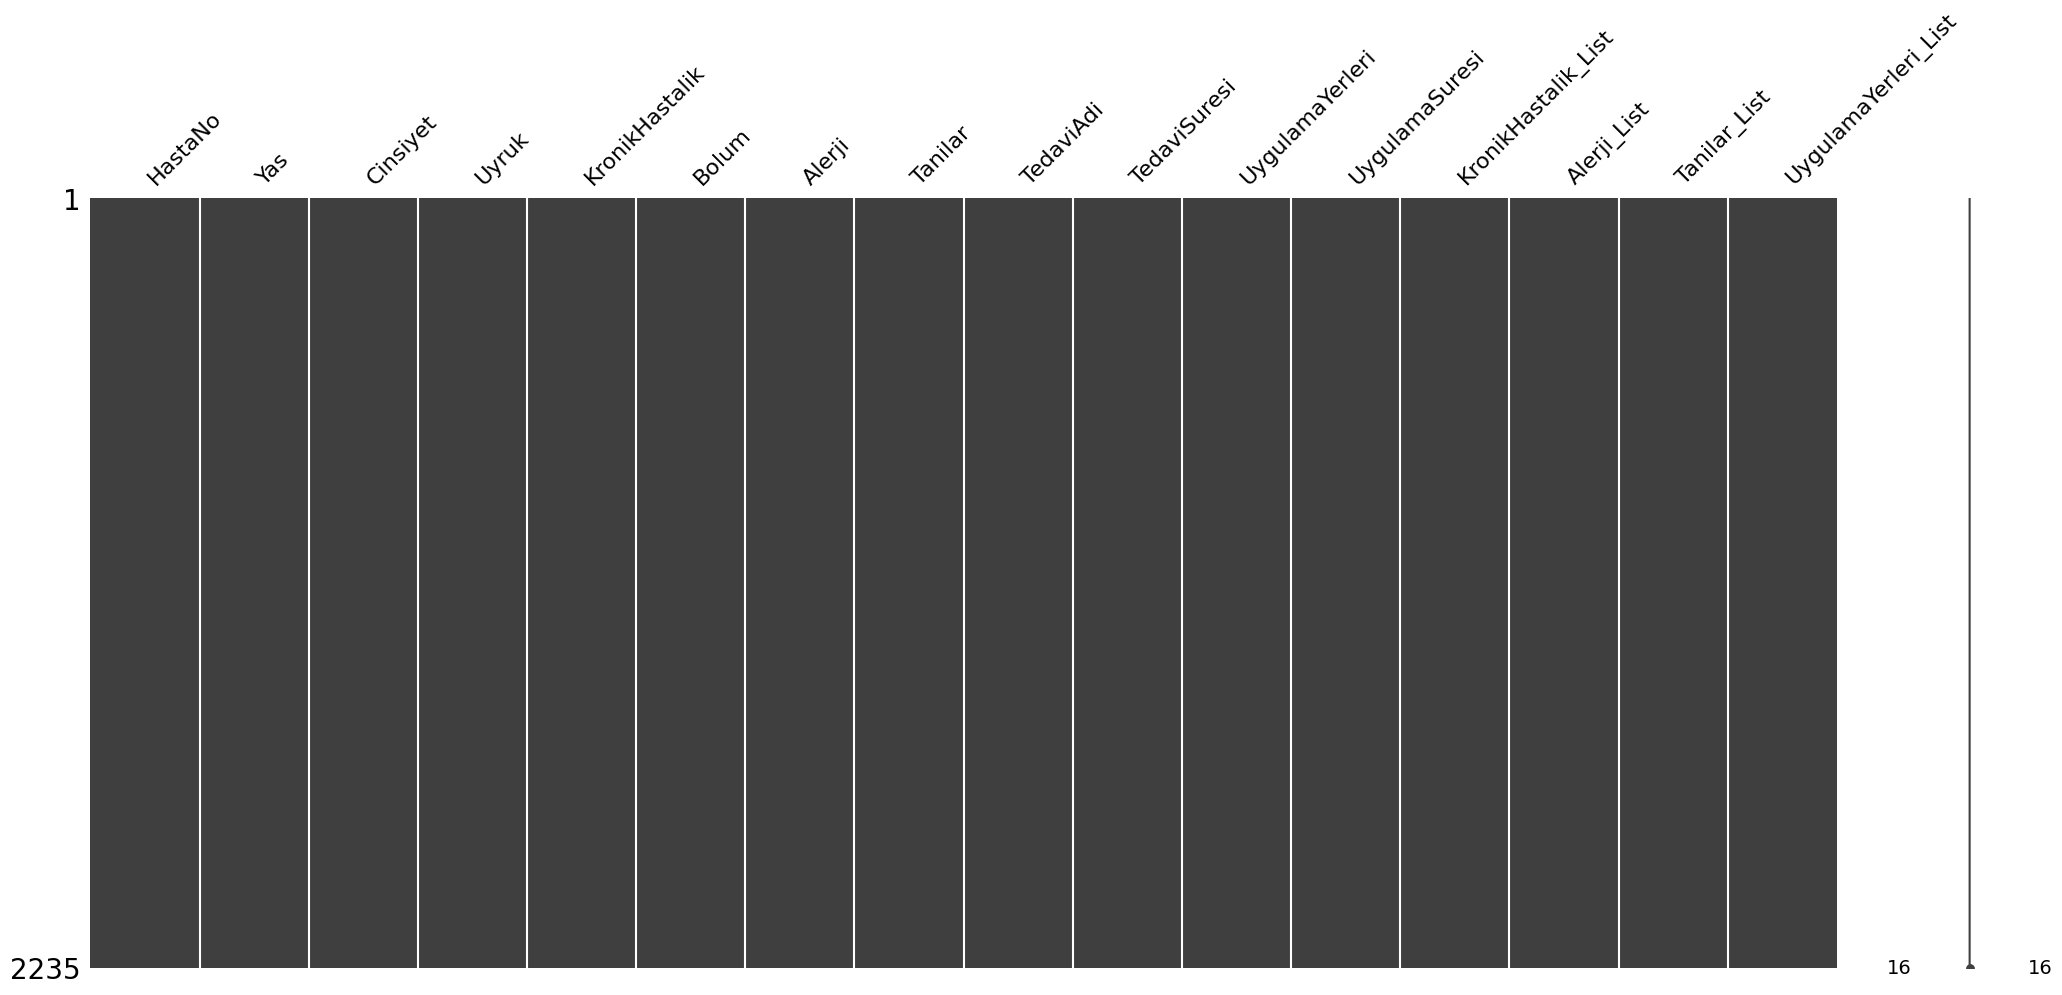

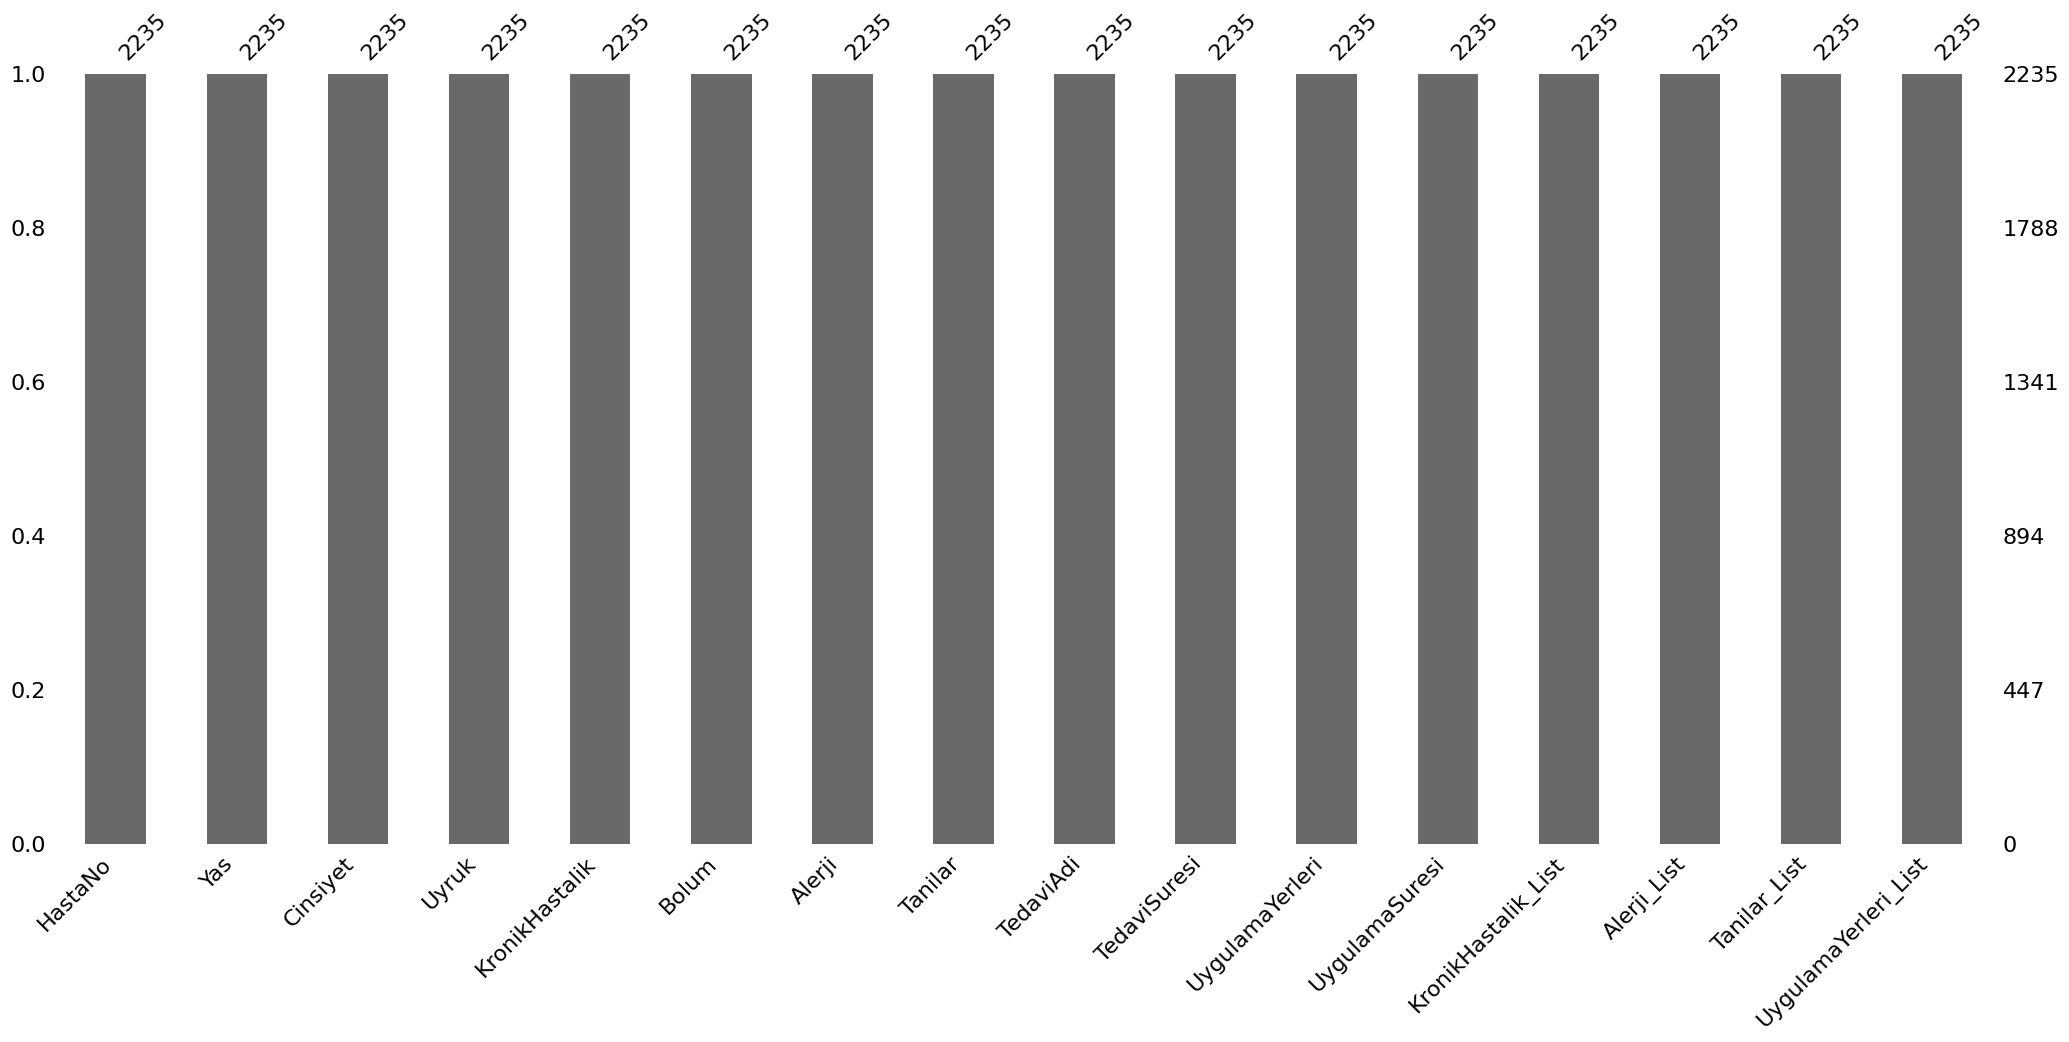

✅ Temizlenmiş ve doldurulmuş veri başarıyla kaydedildi: C:/Users/PC/Desktop/Pusula Intern DataSets/data/processed/pusula_clean_ready.xlsx


In [3]:
#EDA

# 🔍 Eksik veri analizi (kaç adet eksik var?)
df.isnull().sum().sort_values(ascending=False)


import missingno as msno
import matplotlib.pyplot as plt


df.drop(['KanGrubu'], axis=1, inplace=True, errors='ignore')

df['Cinsiyet'].fillna(df['Cinsiyet'].mode()[0], inplace=True)

df['KronikHastalik'].fillna("Yok", inplace=True)
df['Alerji'].fillna("Yok", inplace=True)

mask = df['Tanilar'].isnull()

df.loc[mask, 'Tanilar'] = df[mask].apply(
    lambda row: df[df['TedaviAdi'] == row['TedaviAdi']]['Tanilar'].mode()[0]
    if not df[df['TedaviAdi'] == row['TedaviAdi']]['Tanilar'].mode().empty
    else "Tanı yok",
    axis=1
)

mask = df['UygulamaYerleri'].isnull()

df.loc[mask, 'UygulamaYerleri'] = df[mask].apply(
    lambda row: df[df['Tanilar'] == row['Tanilar']]['UygulamaYerleri'].mode()[0]
    if not df[df['Tanilar'] == row['Tanilar']]['UygulamaYerleri'].mode().empty
    else "Bilinmiyor",
    axis=1
)
df['Bolum'].fillna(df['Bolum'].mode()[0], inplace=True)

def tedavi_doldur(row):
    if pd.isna(row['TedaviAdi']):
        tanilar = row['Tanilar']
        uygunlar = df[(df['Tanilar'] == tanilar) & (df['TedaviAdi'].notna())]
        if not uygunlar.empty:
            return uygunlar['TedaviAdi'].mode()[0]
        else:
            return "belirtilmemiş"
    else:
        return row['TedaviAdi']

df['TedaviAdi'] = df.apply(tedavi_doldur, axis=1)

df.isnull().sum()



# UygulamaYerleri_List sütunundaki string listeleri listeye çevir
df['UygulamaYerleri_List'] = df['UygulamaYerleri_List'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Tanıya göre doldurma işlemi
uygulama_mapping = (
    df[df['UygulamaYerleri_List'].apply(lambda x: isinstance(x, list) and len(x) > 0)]
    .groupby('Tanilar')['UygulamaYerleri_List']
    .first()
)

def doldur_uygulama_yeri(row):
    if not row['UygulamaYerleri_List'] or len(row['UygulamaYerleri_List']) == 0:
        return uygulama_mapping.get(row['Tanilar'], [])
    return row['UygulamaYerleri_List']

df['UygulamaYerleri_List'] = df.apply(doldur_uygulama_yeri, axis=1)



print("Eksik uygulama yerleri tanılara göre dolduruldu ve dosya kaydedildi.")


# Eksik veri matrisini çiz
msno.matrix(df)
plt.show()

# Eksik veri bar grafiği
msno.bar(df)
plt.show()

pd.set_option("display.max_columns", None)  # Tüm sütunları göster
df.head(2235)  # İlk 10 satırı getir

# 📂 Temizlenmiş ve doldurulmuş veriyi Excel olarak kaydet
output_path = "C:/Users/PC/Desktop/Pusula Intern DataSets/data/processed/pusula_clean_ready.xlsx"

# openpyxl motoru ile Excel'e yazdırıyoruz
df.to_excel(output_path, index=False, engine="openpyxl")

print("✅ Temizlenmiş ve doldurulmuş veri başarıyla kaydedildi:", output_path)







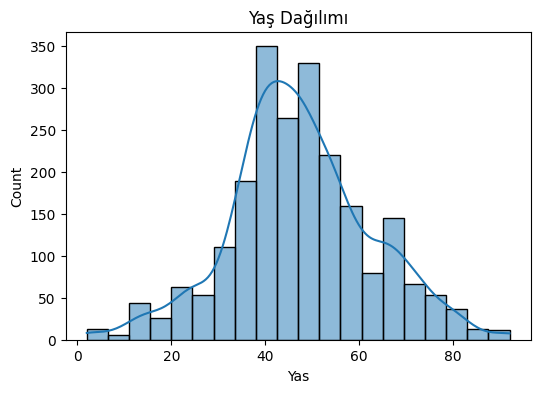

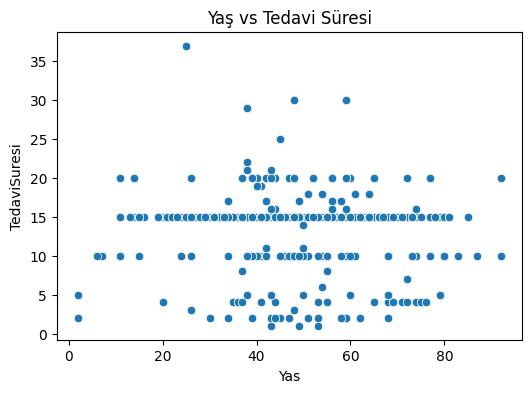

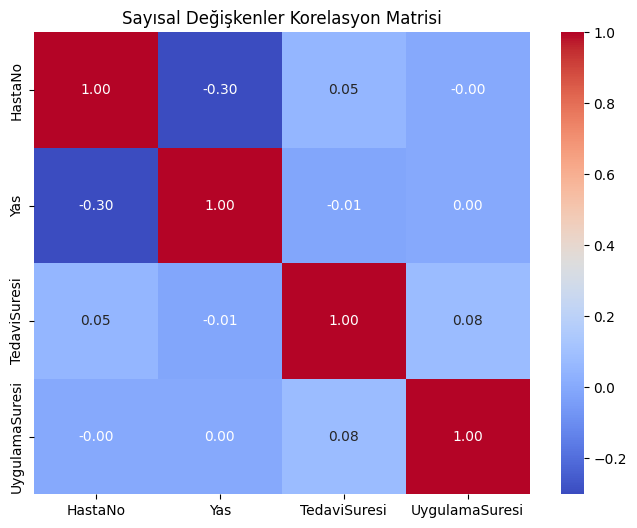

In [4]:
# EDA kısım 2 

# Yaş dağılımı
plt.figure(figsize=(6,4))
sns.histplot(df['Yas'], kde=True, bins=20)
plt.title("Yaş Dağılımı")
plt.show()

# Yaş - Tedavi Süresi ilişkisi
plt.figure(figsize=(6,4))
sns.scatterplot(x='Yas', y='TedaviSuresi', data=df)
plt.title("Yaş vs Tedavi Süresi")
plt.show()

# Korelasyon ısı haritası (sayısal değişkenler için)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()


In [5]:
  # ENCODE 

from sklearn.preprocessing import OneHotEncoder


# 1. Küçük kategoriler (az unique değerli olanlar)
small_cat_cols = [col for col in ['Cinsiyet', 'Uyruk', 'Bolum'] if col in df.columns]

encoder_small = OneHotEncoder(sparse_output=False, drop="first")
encoded_small = encoder_small.fit_transform(df[small_cat_cols])
encoded_small_cols = encoder_small.get_feature_names_out(small_cat_cols)
encoded_small_df = pd.DataFrame(encoded_small, columns=encoded_small_cols, index=df.index)

# 2. Büyük kategoriler (çok unique değerli olanlar → gruplayıp encode)
def group_top_categories(series, top_n=20):
    top_values = series.value_counts().nlargest(top_n).index
    return series.apply(lambda x: x if x in top_values else "Diğer")

df['Tanilar_Grouped'] = group_top_categories(df['Tanilar'], 20)
df['TedaviAdi_Grouped'] = group_top_categories(df['TedaviAdi'], 20)
df['KronikHastalik_Grouped'] = group_top_categories(df['KronikHastalik'], 20)

big_cat_cols = ['Tanilar_Grouped', 'TedaviAdi_Grouped', 'KronikHastalik_Grouped']

encoder_big = OneHotEncoder(sparse_output=False, drop="first")
encoded_big = encoder_big.fit_transform(df[big_cat_cols])
encoded_big_cols = encoder_big.get_feature_names_out(big_cat_cols)
encoded_big_df = pd.DataFrame(encoded_big, columns=encoded_big_cols, index=df.index)

# 3. Encode edilmiş veriyi birleştirme
df_encoded = pd.concat([df.drop(columns=small_cat_cols + big_cat_cols),
                        encoded_small_df, encoded_big_df], axis=1)

print("Encode edilmiş veri boyutu:", df_encoded.shape)
df_encoded.head()

df_manual_encoded = df_encoded.drop(
    columns=["HastaNo", "KronikHastalik", "Alerji", "Tanilar", 
             "TedaviAdi", "UygulamaYerleri", 
             "KronikHastalik_List", "Alerji_List", 
             "Tanilar_List", "UygulamaYerleri_List"]
)





Encode edilmiş veri boyutu: (2235, 87)


In [6]:
# Scalıng

from sklearn.preprocessing import StandardScaler

# Sayısal kolonları scale et
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df[['Yas', 'TedaviSuresi', 'UygulamaSuresi']])
scaled_numeric_df = pd.DataFrame(scaled_numeric, 
                                 columns=['Yas', 'TedaviSuresi', 'UygulamaSuresi'], 
                                 index=df.index)

# Encode edilmiş veriye ekle
df_manual_encoded_scaled = pd.concat([df_manual_encoded, scaled_numeric_df], axis=1)

print("Manuel encode + scaling boyutu:", df_manual_encoded_scaled.shape)

# Ölçeklenecek sayısal kolonlar
numeric_cols = ['Yas', 'TedaviSuresi', 'UygulamaSuresi']

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols].astype(float))

print("Sayısal kolonlar ölçeklendi ✅")
df_encoded[numeric_cols].head()


Manuel encode + scaling boyutu: (2235, 80)
Sayısal kolonlar ölçeklendi ✅


,Yas,TedaviSuresi,UygulamaSuresi
0,0.833459,-2.569726,0.546788
1,-1.271080,0.115206,0.546788
2,-1.271080,0.115206,0.546788
3,-1.271080,0.115206,-1.846613
4,-1.271080,0.115206,0.546788


In [7]:
df_encoded.to_csv("pusula_manual_encoded_ready.csv", index=False)
print("Hazırlanan veri başarıyla kaydedildi ✅")


Hazırlanan veri başarıyla kaydedildi ✅


In [8]:
# Pipeline (Opsiyonel)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# --- 1. Büyük kategoriler için grouping fonksiyonu ---
def group_top_categories(series, top_n=20):
    top_values = series.value_counts().nlargest(top_n).index
    return series.apply(lambda x: x if x in top_values else "Diğer")

# --- 2. Grup kolonlarını oluştur ---
df['Tanilar_Grouped'] = group_top_categories(df['Tanilar'], 20)
df['TedaviAdi_Grouped'] = group_top_categories(df['TedaviAdi'], 20)
df['KronikHastalik_Grouped'] = group_top_categories(df['KronikHastalik'], 20)

# --- 3. Numeric özellikler ---
numeric_features = ['Yas', 'TedaviSuresi', 'UygulamaSuresi']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# --- 4. Küçük kategorik özellikler ---
small_cat_features = ['Cinsiyet', 'Uyruk', 'Bolum']
small_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# --- 5. Büyük kategorik özellikler ---
big_cat_features = ['Tanilar_Grouped', 'TedaviAdi_Grouped', 'KronikHastalik_Grouped']
big_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# --- 6. ColumnTransformer ile birleştirme ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('small_cat', small_cat_transformer, small_cat_features),
        ('big_cat', big_cat_transformer, big_cat_features)
    ],
    remainder='drop'
)

# --- 7. Pipeline oluştur ---
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# --- 8. Pipeline uygula ---
df_ready = pipeline.fit_transform(df)

# --- 9. Sparse -> Array dönüşümü + Feature isimleri ---
import numpy as np

if not isinstance(df_ready, np.ndarray):
    df_ready = df_ready.toarray()

feature_names = (
    list(numeric_features)
    + list(pipeline.named_steps['preprocessor']
           .named_transformers_['small_cat']
           .named_steps['encoder']
           .get_feature_names_out(small_cat_features))
    + list(pipeline.named_steps['preprocessor']
           .named_transformers_['big_cat']
           .named_steps['encoder']
           .get_feature_names_out(big_cat_features))
)

# --- 10. DataFrame oluştur ---
df_ready_df = pd.DataFrame(df_ready, columns=feature_names)

print("Pipeline tamamlandı ✅")
print("Pipeline sonucu boyut:", df_ready_df.shape)
df_ready_df.head()




Pipeline tamamlandı ✅
Pipeline sonucu boyut: (2235, 77)


,Yas,TedaviSuresi,UygulamaSuresi,Cinsiyet_Kadın,Uyruk_Azerbaycan,Uyruk_Libya,Uyruk_Tokelau,Uyruk_Türkiye,Bolum_Genel Cerrahi,Bolum_Göğüs Hastalıkları,Bolum_Kalp ve Damar Cerrahisi,Bolum_Kardiyoloji,Bolum_Laboratuvar,Bolum_Nöroloji,Bolum_Ortopedi Ve Travmatoloji,Bolum_Tıbbi Onkoloji,Bolum_İç Hastalıkları,Tanilar_Grouped_Diğer,"Tanilar_Grouped_Dorsalji, tanımlanmamış","Tanilar_Grouped_Dorsalji̇, di̇ğer, Lumbosakral Bölge","Tanilar_Grouped_Dorsalji̇, di̇ğer, servi̇kal bölge","Tanilar_Grouped_Dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge","Tanilar_Grouped_Dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge,Dorsalji̇, di̇ğer, Lumbosakral Bölge","Tanilar_Grouped_Dorsalji̇, di̇ğer, torasi̇k bölge",Tanilar_Grouped_Gonartroz [diz ekleminin artrozu],Tanilar_Grouped_Radikülopati,Tanilar_Grouped_aşil tendon yaralanması,Tanilar_Grouped_boyun ağrısı,Tanilar_Grouped_eklem ağrısı,Tanilar_Grouped_eklemin kontraktürü,"Tanilar_Grouped_ekstremite ağrısı, bacak,spondilolistezis,omuzun darbe sendromu,Dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge","Tanilar_Grouped_i̇ntervertebral disk bozuklukları, diğer","Tanilar_Grouped_i̇ntervertebral disk bozuklukları, tanımlanmamış","Tanilar_Grouped_menisküs yırtığı, şimdiki",Tanilar_Grouped_omuzun darbe sendromu,"Tanilar_Grouped_omuzun darbe sendromu,Dorsalji̇, di̇ğer, servi̇kal bölge",Tanilar_Grouped_ortopedik eklem implantı,TedaviAdi_Grouped_Bel Ftr,TedaviAdi_Grouped_Boyun-Trapezz,TedaviAdi_Grouped_Diğer,TedaviAdi_Grouped_Dorsalji,TedaviAdi_Grouped_Dorsalji - Bel,TedaviAdi_Grouped_Dorsalji - Boyun + Trapez,TedaviAdi_Grouped_Dorsalji Boyun 1,TedaviAdi_Grouped_Dorsalji-Dorsal,TedaviAdi_Grouped_El Rehabilitasyonu,TedaviAdi_Grouped_Gonartroz - Meniskopati,TedaviAdi_Grouped_Impingement Sağ,TedaviAdi_Grouped_İV Di̇Sk Bozukluğu-Bel,TedaviAdi_Grouped_İV Di̇Sk Bozukluğu-Bel-2,TedaviAdi_Grouped_Meni̇Sküs Tami̇Ri̇,TedaviAdi_Grouped_Patella Kırığı,TedaviAdi_Grouped_Sağ Omuz İMpi̇Ngement,TedaviAdi_Grouped_Skolyoz,TedaviAdi_Grouped_Sol Diz Implantı Reh,TedaviAdi_Grouped_Sol Omuz Impingement,TedaviAdi_Grouped_Sol Omuz İMpingement,KronikHastalik_Grouped_Diğer,KronikHastalik_Grouped_aritmi,KronikHastalik_Grouped_astım,KronikHastalik_Grouped_becker musküler distrofisi,KronikHastalik_Grouped_diyabet,KronikHastalik_Grouped_duchenne musküler distrofisi,KronikHastalik_Grouped_fascioscapulohumeral distrofi,KronikHastalik_Grouped_hipertansiyon,KronikHastalik_Grouped_hiportiroidizm,"KronikHastalik_Grouped_hiportiroidizm, astım, aritmi, diyabet","KronikHastalik_Grouped_hiportiroidizm, limb-girdle musküler distrofi, polimiyozit, hipertansiyon",KronikHastalik_Grouped_hipotiroidizm,"KronikHastalik_Grouped_hipotiroidizm, aritmi",KronikHastalik_Grouped_kalp yetmezligi,KronikHastalik_Grouped_limb-girdle musküler distrofi,"KronikHastalik_Grouped_limb-girdle musküler distrofi, astım","KronikHastalik_Grouped_limb-girdle musküler distrofi, fascioscapulohumeral distrofi","KronikHastalik_Grouped_limb-girdle musküler distrofi, hipotiroidizm","KronikHastalik_Grouped_limb-girdle musküler distrofi, kalp yetmezligi, astım, polimiyozit",KronikHastalik_Grouped_myastenia gravis
0,0.833459,-2.569726,0.546788,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.271080,0.115206,0.546788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.271080,0.115206,0.546788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

In [9]:
# --- Pipeline çıktısını al (dense array olarak) ---
df_ready = pipeline.fit_transform(df)

# Eğer sparse matrix ise array'e çevir
if hasattr(df_ready, "toarray"):
    df_ready = df_ready.toarray()

# --- Özellik isimlerini al ---
feature_names = []

# numeric
feature_names.extend(numeric_features)

# small_cat
small_cat_names = pipeline.named_steps['preprocessor'] \
    .named_transformers_['small_cat'] \
    .named_steps['encoder'] \
    .get_feature_names_out(small_cat_features)
feature_names.extend(small_cat_names)

# big_cat
big_cat_names = pipeline.named_steps['preprocessor'] \
    .named_transformers_['big_cat'] \
    .named_steps['encoder'] \
    .get_feature_names_out(big_cat_features)
feature_names.extend(big_cat_names)

# --- DataFrame'e çevir ---
df_ready_df = pd.DataFrame(df_ready, columns=feature_names)

print("Pipeline sonucu boyut:", df_ready_df.shape)
display(df_ready_df.head())

# --- Pipeline çıktısını kaydet ---
df_ready_df.to_excel("pipeline_ready.xlsx", index=False, engine="openpyxl")
print("✅ Pipeline verisi başarıyla kaydedildi -> pipeline_ready.xlsx")


Pipeline sonucu boyut: (2235, 77)


,Yas,TedaviSuresi,UygulamaSuresi,Cinsiyet_Kadın,Uyruk_Azerbaycan,Uyruk_Libya,Uyruk_Tokelau,Uyruk_Türkiye,Bolum_Genel Cerrahi,Bolum_Göğüs Hastalıkları,Bolum_Kalp ve Damar Cerrahisi,Bolum_Kardiyoloji,Bolum_Laboratuvar,Bolum_Nöroloji,Bolum_Ortopedi Ve Travmatoloji,Bolum_Tıbbi Onkoloji,Bolum_İç Hastalıkları,Tanilar_Grouped_Diğer,"Tanilar_Grouped_Dorsalji, tanımlanmamış","Tanilar_Grouped_Dorsalji̇, di̇ğer, Lumbosakral Bölge","Tanilar_Grouped_Dorsalji̇, di̇ğer, servi̇kal bölge","Tanilar_Grouped_Dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge","Tanilar_Grouped_Dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge,Dorsalji̇, di̇ğer, Lumbosakral Bölge","Tanilar_Grouped_Dorsalji̇, di̇ğer, torasi̇k bölge",Tanilar_Grouped_Gonartroz [diz ekleminin artrozu],Tanilar_Grouped_Radikülopati,Tanilar_Grouped_aşil tendon yaralanması,Tanilar_Grouped_boyun ağrısı,Tanilar_Grouped_eklem ağrısı,Tanilar_Grouped_eklemin kontraktürü,"Tanilar_Grouped_ekstremite ağrısı, bacak,spondilolistezis,omuzun darbe sendromu,Dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge","Tanilar_Grouped_i̇ntervertebral disk bozuklukları, diğer","Tanilar_Grouped_i̇ntervertebral disk bozuklukları, tanımlanmamış","Tanilar_Grouped_menisküs yırtığı, şimdiki",Tanilar_Grouped_omuzun darbe sendromu,"Tanilar_Grouped_omuzun darbe sendromu,Dorsalji̇, di̇ğer, servi̇kal bölge",Tanilar_Grouped_ortopedik eklem implantı,TedaviAdi_Grouped_Bel Ftr,TedaviAdi_Grouped_Boyun-Trapezz,TedaviAdi_Grouped_Diğer,TedaviAdi_Grouped_Dorsalji,TedaviAdi_Grouped_Dorsalji - Bel,TedaviAdi_Grouped_Dorsalji - Boyun + Trapez,TedaviAdi_Grouped_Dorsalji Boyun 1,TedaviAdi_Grouped_Dorsalji-Dorsal,TedaviAdi_Grouped_El Rehabilitasyonu,TedaviAdi_Grouped_Gonartroz - Meniskopati,TedaviAdi_Grouped_Impingement Sağ,TedaviAdi_Grouped_İV Di̇Sk Bozukluğu-Bel,TedaviAdi_Grouped_İV Di̇Sk Bozukluğu-Bel-2,TedaviAdi_Grouped_Meni̇Sküs Tami̇Ri̇,TedaviAdi_Grouped_Patella Kırığı,TedaviAdi_Grouped_Sağ Omuz İMpi̇Ngement,TedaviAdi_Grouped_Skolyoz,TedaviAdi_Grouped_Sol Diz Implantı Reh,TedaviAdi_Grouped_Sol Omuz Impingement,TedaviAdi_Grouped_Sol Omuz İMpingement,KronikHastalik_Grouped_Diğer,KronikHastalik_Grouped_aritmi,KronikHastalik_Grouped_astım,KronikHastalik_Grouped_becker musküler distrofisi,KronikHastalik_Grouped_diyabet,KronikHastalik_Grouped_duchenne musküler distrofisi,KronikHastalik_Grouped_fascioscapulohumeral distrofi,KronikHastalik_Grouped_hipertansiyon,KronikHastalik_Grouped_hiportiroidizm,"KronikHastalik_Grouped_hiportiroidizm, astım, aritmi, diyabet","KronikHastalik_Grouped_hiportiroidizm, limb-girdle musküler distrofi, polimiyozit, hipertansiyon",KronikHastalik_Grouped_hipotiroidizm,"KronikHastalik_Grouped_hipotiroidizm, aritmi",KronikHastalik_Grouped_kalp yetmezligi,KronikHastalik_Grouped_limb-girdle musküler distrofi,"KronikHastalik_Grouped_limb-girdle musküler distrofi, astım","KronikHastalik_Grouped_limb-girdle musküler distrofi, fascioscapulohumeral distrofi","KronikHastalik_Grouped_limb-girdle musküler distrofi, hipotiroidizm","KronikHastalik_Grouped_limb-girdle musküler distrofi, kalp yetmezligi, astım, polimiyozit",KronikHastalik_Grouped_myastenia gravis
0,0.833459,-2.569726,0.546788,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.271080,0.115206,0.546788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.271080,0.115206,0.546788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

✅ Pipeline verisi başarıyla kaydedildi -> pipeline_ready.xlsx


In [10]:
manual_cols = set(df_manual_encoded_scaled.columns)
pipeline_cols = set(df_ready_df.columns)

print("Manuel encode sütun sayısı:", len(manual_cols))
print("Pipeline sütun sayısı:", len(pipeline_cols))

print("\n👉 Manuel encode’de olup Pipeline’da olmayanlar:", manual_cols - pipeline_cols)
print("👉 Pipeline’da olup Manuel’de olmayanlar:", pipeline_cols - manual_cols)



Manuel encode sütun sayısı: 77
Pipeline sütun sayısı: 77

👉 Manuel encode’de olup Pipeline’da olmayanlar: set()
👉 Pipeline’da olup Manuel’de olmayanlar: set()
